In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install folium matplotlib
import folium

In [ ]:
m = folium.Map(zoom_start = 6)

existing_dcs = [
    {'latitude': 35.393528, 'longitude': - 119.043732, 'name': 'Bakersfield, CA'},
    {'latitude': 38.2805, 'longitude': -104.4672, 'name': 'Pueblo, CO'},
    {'latitude': 44.979595, 'longitude': -93.276566, 'name': 'Woodbury, MN'},
    {'latitude': 40.028900, 'longitude': -77.590698, 'name': 'Chambersberg, PN'}
]

for location in existing_dcs:
    new_marker = folium.Marker(
        location=[location['latitude'], location['longitude']],
        popup=location['name'],
        icon=folium.Icon(color='red')
    )

    new_marker.add_to(m)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')

In [ ]:
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada


In [ ]:
# df1 = df.filter(['order_frequency','avg_order_value','returns_rate','guest_segmentation','shipping_preferences','promotional_response','state'],axis =1)

In [ ]:
# df1.head(5)

In [ ]:
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


In [ ]:
df2 = df.drop(['guest_id','country','geographic_loc','state'],axis =1)

In [ ]:
df2.head(5)

,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,latitude,longitude
0,12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,41.934523,-114.793454
1,17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,28.411406,-98.053030
2,9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,37.861983,-79.324797
3,3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,33.101184,-115.570116
4,14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,49.022389,-123.155575


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

numerical_cols = ['order_frequency','returns_rate']
scaler = StandardScaler()
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


In [ ]:
categorical_cols = ['shipping_preferences','promotional_response']
# encoder = LabelEncoder()
# df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])
encoder = OrdinalEncoder()
df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])


In [ ]:
# df2[categorical_cols]

In [ ]:
combined_features = numerical_cols + categorical_cols
combined_features

['order_frequency',
 'returns_rate',
 'shipping_preferences',
 'promotional_response']

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
selected_features1 = ['order_frequency','latitude','longitude','shipping_preferences']

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10696, ncost: 374717.1140423819
Run: 1, iteration: 2/100, moves: 3067, ncost: 365723.7339631914
Run: 1, iteration: 3/100, moves: 2416, ncost: 360705.43503338716
Run: 1, iteration: 4/100, moves: 1838, ncost: 358011.6135158305
Run: 1, iteration: 5/100, moves: 1340, ncost: 356654.9338947739
Run: 1, iteration: 6/100, moves: 910, ncost: 356024.2906440068
Run: 1, iteration: 7/100, moves: 694, ncost: 355685.981607487
Run: 1, iteration: 8/100, moves: 520, ncost: 355476.50594166445
Run: 1, iteration: 9/100, moves: 422, ncost: 355344.2433402702
Run: 1, iteration: 10/100, moves: 326, ncost: 355261.56073726574
Run: 1, iteration: 11/100, moves: 254, ncost: 355215.97762451944
Run: 1, iteration: 12/100, moves: 156, ncost: 355198.0333024603
Run: 1, iteration: 13/100, moves: 97, ncost: 355189.8657435951
Run: 1, itera

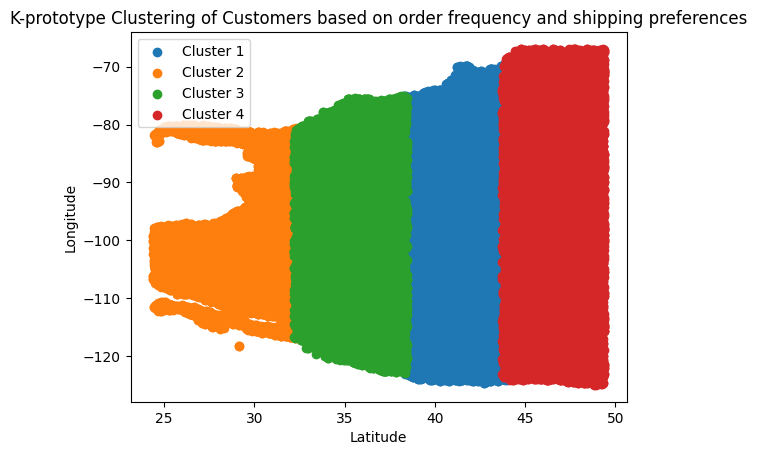

In [20]:
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features1].values, categorical=[2,3])
df2['cluster1'] = clusters

for cluster_num in range(k):
    cluster_data = df2[df2['cluster1'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency and shipping preferences')
plt.legend()
plt.show()

In [30]:
selected_features2 = ['order_frequency','latitude','longitude','promotional_response']

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 17517, ncost: 403236.7986005494
Run: 1, iteration: 2/100, moves: 5441, ncost: 378542.9101025665
Run: 1, iteration: 3/100, moves: 3781, ncost: 367122.0092201985
Run: 1, iteration: 4/100, moves: 2796, ncost: 361340.46967332414
Run: 1, iteration: 5/100, moves: 1991, ncost: 358610.9575250378
Run: 1, iteration: 6/100, moves: 1418, ncost: 357202.2896679948
Run: 1, iteration: 7/100, moves: 1017, ncost: 356481.08078556304
Run: 1, iteration: 8/100, moves: 789, ncost: 356041.23049681215
Run: 1, iteration: 9/100, moves: 551, ncost: 355823.12998047774
Run: 1, iteration: 10/100, moves: 420, ncost: 355694.81910116033
Run: 1, iteration: 11/100, moves: 285, ncost: 355636.43743064645
Run: 1, iteration: 12/100, moves: 232, ncost: 355600.18609712756
Run: 1, iteration: 13/100, moves: 153, ncost: 355583.7295118523
Run: 1

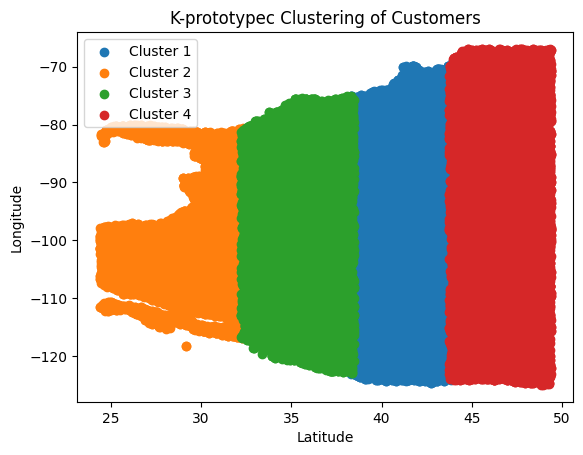

In [22]:
k = 4
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features2].values, categorical=[2,3])
df2['cluster2'] = clusters

for cluster_num in range(k):
    cluster_data = df2[df2['cluster2'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency and promotional response')
plt.legend()
plt.show()

In [23]:
# selected_features3 = ['order_frequency','returns_rate','latitude','longitude','shipping_preferences','promotional_response']

In [24]:
# k = 3
# kproto = KPrototypes(n_clusters=k,verbose = 1)
# clusters = kproto.fit_predict(df2[selected_features3].values, categorical=[2,3])

# df2['cluster3'] = clusters

# for cluster_num in range(k):
#     cluster_data = df2[df2['cluster3'] == cluster_num]
#     plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

# plt.xlabel('Latitude')
# plt.ylabel('Longitude')
# plt.title('K-prototypec Clustering of Customers')
# plt.legend()
# plt.show()

In [25]:
# !pip install geopy
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent="geo_converter")
# new_dc_loc = []
# for cluster in df2['cluster'].unique():
#   cluster_data = df2[df2['cluster'] == cluster]
#   latitude = cluster_data['latitude'].mean()
#   longitude = cluster_data['longitude'].mean()

#   location = geolocator.reverse(f"{latitude}, {longitude}",exactly_one = True)
#   location_name = location.address
#   new_dc_loc.append(location_name.split(',')[2].strip())
# print(new_dc_loc)


In [26]:
# m1 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)

#new dcs map
for cluster in df2['cluster1'].unique():
    cluster_data = df2[df2['cluster1'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    marker1 = folium.Marker(
        location=cluster_center,
        popup=f'Cluster {cluster}',
        icon=folium.Icon(color='blue')
    )

    marker1.add_to(m)
m

In [27]:
# m2 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
# new dcs map
for cluster in df2['cluster2'].unique():
    cluster_data = df2[df2['cluster2'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    marker2 = folium.Marker(
        location=cluster_center,
        popup=f'Cluster {cluster}',
        icon=folium.Icon(color='green')
    )

    marker2.add_to(m)
m

In [28]:
# m3 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
#new dcs map
# for cluster in df2['cluster3'].unique():
#     cluster_data = df2[df2['cluster3'] == cluster]
#     cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

#     marker3 = folium.Marker(
#         location=cluster_center,
#         popup=f'Cluster {cluster}',
#         icon=folium.Icon(color='orange')
#     )

#     marker3.add_to(m)
# m

In [29]:
# k_values = range(1, 11)


# costs = []
# for k in k_values:
#     print(k)
#     kproto = KPrototypes(n_clusters=k,init = 'Cao' verbose=1)
#     clusters = kproto.fit_predict(df2[combined_features].values, categorical=[2, 3])
#     cost = kproto.cost_
#     costs.append(cost)


# plt.figure(figsize=(8, 6))
# plt.plot(k_values, costs, marker='o', linestyle='-', color='b')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Cost')
# plt.title('Elbow Method for Optimal K')
# plt.grid(True)
# plt.show()